In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt

In [1]:
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def vertorize_sequence(sequences , dimension=10000):
  """This function a sequnce of 0 and 1 format for binary classification.
  This one is used for input feature."""
  results = np.zeros((len(sequences) , dimension))
  for i , sequence in enumerate(sequences):
    results[i , sequence] = 1
  return results

x_train = vertorize_sequence(train_data)
x_test = vertorize_sequence(test_data)

In [4]:
def to_one_hot(labels , dimension=46):
  """This function a sequnce of 0 and 1 format for binary classification.
  This one is used for output feature."""
  results = np.zeros((len(labels) , dimension))
  for i , labels in enumerate(labels):
    results[i , labels] = 1
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [6]:
model = keras.Sequential([
    layers.Dense(64 , activation="relu"),
    layers.Dense(64 , activation="relu"),
    layers.Dense(46 , activation="softmax")
])

In [7]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [9]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.4159 - loss: 3.2221 - val_accuracy: 0.6220 - val_loss: 1.7836
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.6700 - loss: 1.6027 - val_accuracy: 0.7020 - val_loss: 1.3783
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7406 - loss: 1.2119 - val_accuracy: 0.7280 - val_loss: 1.2182
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7819 - loss: 1.0085 - val_accuracy: 0.7480 - val_loss: 1.1347
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8132 - loss: 0.8380 - val_accuracy: 0.7770 - val_loss: 1.0374
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8460 - loss: 0.7193 - val_accuracy: 0.7660 - val_loss: 1.0212
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8697 - loss: 0.5951 - val_accuracy: 0.7980 - val_loss: 0.9601
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8933 - loss: 0.4957 - val_accuracy: 0.8100 -

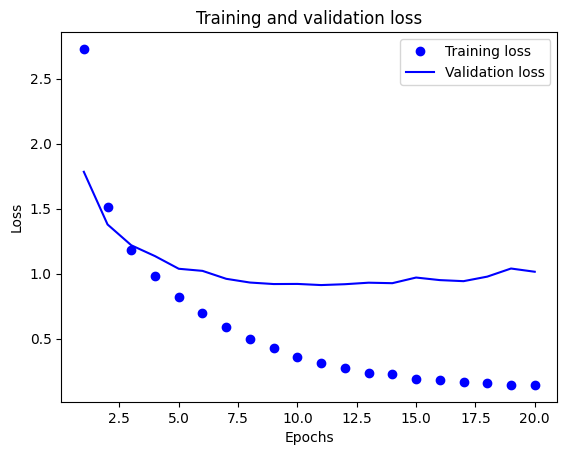

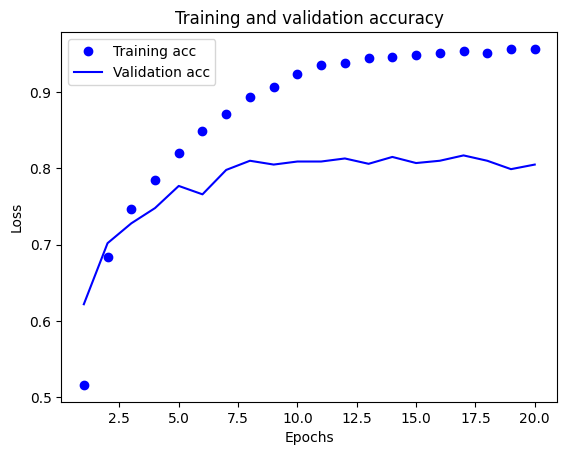

In [11]:
history_dict = history.history
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
def model_from_sractch():
  """This is the base model for the reuters dataset.
  without any vectorization and one-hot encoding..."""
  model = keras.Sequential([
    layers.Dense(64 , activation="relu"),
    layers.Dense(64 , activation="relu"),
    layers.Dense(46 , activation="softmax")
  ])
  model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  )

  model.fit(x_train , y_train , epochs=9 , batch_size=512)
  results = model.evaluate(x_test , y_test)
  return results

print(model_from_sractch())

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3955 - loss: 3.2141
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6739 - loss: 1.6003
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.7369 - loss: 1.2098
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7918 - loss: 0.9815
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8331 - loss: 0.8187
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8610 - loss: 0.6713
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8889 - loss: 0.5495
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.9074 - loss: 0.4499
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9191 - loss: 0.3847
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8040 - loss: 0.9013
[0.9244192242622375, 0.7920747995376587]
